<a href="https://colab.research.google.com/github/Souvik-Kundu063/SCT_ML_2/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history using the dataset "vjchoudhary7/customer-segmentation-tutorial-in-python". Install necessary libraries, load and preprocess the data, train the model, visualize the clusters, and build a web UI to display the results.

## Setup

### Subtask:
Install necessary libraries and download the dataset.


**Reasoning**:
Install the required libraries using pip.



In [1]:
%pip install pandas scikit-learn matplotlib seaborn kaggle gradio

## Setup

### Subtask:
Install necessary libraries and download the dataset.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


## Data Loading

### Subtask:
Load the customer data from the downloaded dataset into a pandas DataFrame.

**Reasoning**:
Load the `Mall_Customers.csv` file from the downloaded dataset path into a pandas DataFrame.

In [3]:
import pandas as pd
import os

file_path = os.path.join(path, 'Mall_Customers.csv')
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

## Data Preprocessing

### Subtask:
Prepare the data for K-means clustering by selecting relevant features and handling missing values if any.

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.isnull().sum())

,0
Annual Income (k$),0
Spending Score (1-100),0


## Model Training

### Subtask:
Apply the K-means algorithm to cluster the customers based on their purchase history.

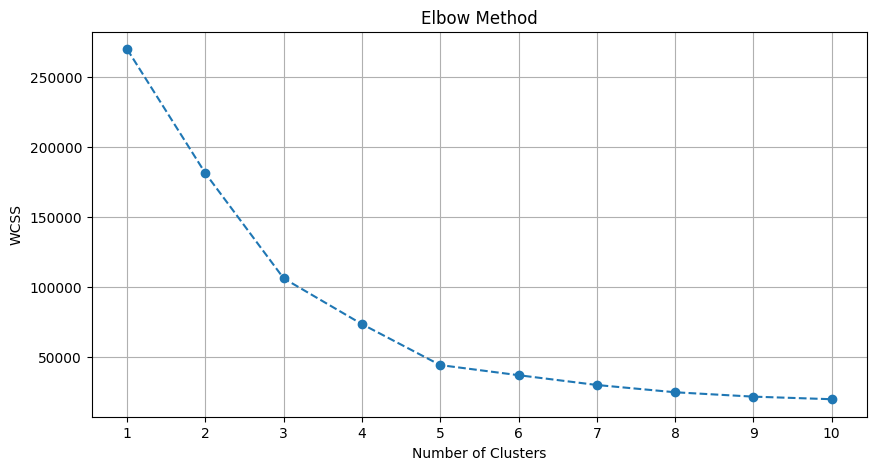

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Based on the elbow method plot, the optimal number of clusters appears to be 5. Now I will train the K-means model with 5 clusters and add the cluster labels to the original DataFrame.

In [6]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Visualization

### Subtask:
Create visualizations (e.g., scatter plots) to represent the customer clusters.

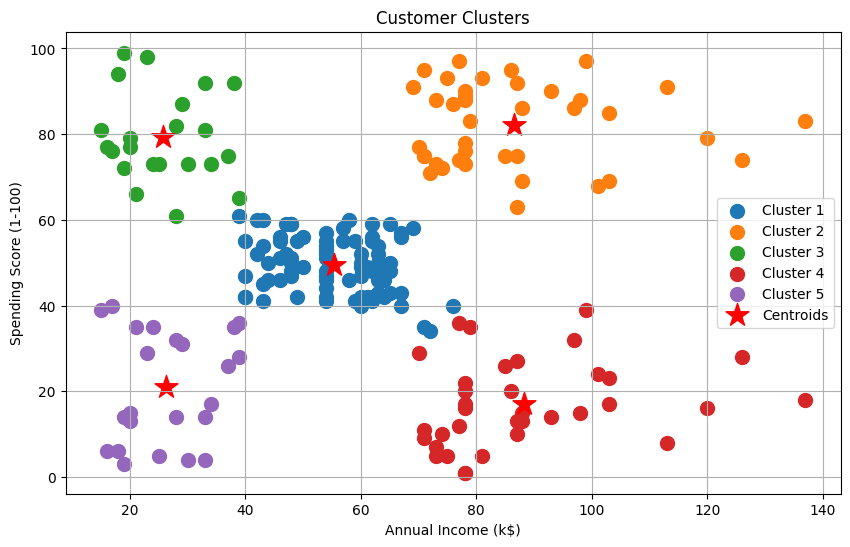

In [7]:
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'], X[y_kmeans == i]['Spending Score (1-100)'], s = 100, label = f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids', marker='*')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## Web UI

### Subtask:
Building a simple web UI using GRADIO

In [8]:
import gradio as gr
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(n_clusters):
    if n_clusters < 1 or n_clusters > len(X):
        return "Please select a valid number of clusters."

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(X[y_kmeans == i]['Annual Income (k$)'], X[y_kmeans == i]['Spending Score (1-100)'], s = 100, label = f'Cluster {i+1}')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids', marker='*')
    plt.title('Customer Clusters')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid(True)

    plot_path = 'clusters.png'
    plt.savefig(plot_path)
    plt.close()
    return plot_path
iface = gr.Interface(
    fn=plot_clusters,
    inputs=gr.Slider(minimum=2, maximum=10, value=5, step=1, label="Number of Clusters"),
    outputs=gr.Image(type="filepath"),
    title="K-Means Customer Clustering",
    description="Explore customer clusters based on Annual Income and Spending Score."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c0c19672aff2c772a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
